# Data Science Mathematics
# Principal Component Analysis
# In-Class Activity

Refer to your in-class handout for instructions.  You are going to do most of the coding yourself here.

**Question 5)** You are a data scientist at a three-letter agency.  You have been following a group of suspected ISIL members on social media, and have derived 4 features from various profiles.  You are developing a supervised learning algorithm for identifying ISIL members based on these features, and need to project your data onto two dimensions for clustering analysis.

 | Feature 1 | Feature 2 | Feature 3 | Feature 4 |
 |-----------|-----------|-----------|-----------|
 |5.1 | 3.5 | 1.4 | 0.2 |
 |4.9 | 3.0 | 1.4 | 0.2 |
 |4.7 | 3.2 | 1.3 | 0.2 |
 |4.6 | 3.1 | 1.5 | 0.2 |
 |5.0 | 3.6 | 1.4 | 0.2 |
 |5.4 | 3.9 | 1.7 | 0.4 |
 |4.6 | 3.4 | 1.4 | 0.3 |
 |5.0 | 3.4 | 1.5 | 0.2 |
 |4.4 | 2.9 | 1.4 | 0.2 |
 |4.9 | 3.1 | 1.5 | 0.1 |
 |5.4 | 3.7 | 1.5 | 0.2 |
 |4.8 | 3.4 | 1.6 | 0.2 |
 |4.8 | 3.0 | 1.4 | 0.1 |
 |4.3 | 3.0 | 1.1 | 0.1 |
 |5.8 | 4.0 | 1.2 | 0.2 |
 |5.7 | 4.4 | 1.5 | 0.4 |
 |5.4 | 3.9 | 1.3 | 0.4 |
 |5.1 | 3.5 | 1.4 | 0.3 |
 |5.7 | 3.8 | 1.7 | 0.3 |
 |5.1 | 3.8 | 1.5 | 0.3 |


a) [Derive a covariance matrix from this data set.](#question_a)

b) [Calculate the feature vector of eigenvalues from the covariance matrix.](#question_b)

c) [Project the dataset into the appropriate principle component space.](#question_c)

d) [Assuming the class of each record is known, explain how this reduced data set could be used to derive a supervised learning algorithm based on clustering.](#question_d)

e) [BONUS: Figure out how to plot your 2D principal components as a scatter plot :](#question_e)
 
Read about this library here:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Reference to create a table of contents with internal links in IPython Notebooks and Markdown documents: https://sebastianraschka.com/Articles/2014_ipython_internal_links.html

First |  let's import our relevant libraries.

In [1]:
import numpy as np
from sklearn.decomposition import PCA

First, we need to instantiate our data set.

In [2]:
data = np.array([[5.1,3.5,1.4,0.2],
[4.9,3.0,1.4,0.2],
[4.7,3.2,1.3,0.2],
[4.6,3.1,1.5,0.2],
[5.0,3.6,1.4,0.2],
[5.4,3.9,1.7,0.4],
[4.6,3.4,1.4,0.3],
[5.0,3.4,1.5,0.2],
[4.4,2.9,1.4,0.2],
[4.9,3.1,1.5,0.1],
[5.4,3.7,1.5,0.2],
[4.8,3.4,1.6,0.2],
[4.8,3.0,1.4,0.1],
[4.3,3.0,1.1,0.1],
[5.8,4.0,1.2,0.2],
[5.7,4.4,1.5,0.4],
[5.4,3.9,1.3,0.4],
[5.1,3.5,1.4,0.3],
[5.7,3.8,1.7,0.3],
[5.1,3.8,1.5,0.3]])

print('Note: Our data set has *{}* Features/Columns and each Feature has *{}* Samples/Rows. Therefore, the dimensions of its covariance will be a {}x{} matrix.'.format(data.shape[1],data.shape[0],data.shape[1],data.shape[1]))
#features = data.shape[1]

Note: Our data set has *4* Features/Columns and each Feature has *20* Samples/Rows. Therefore, the dimensions of its covariance will be a 4x4 matrix.


**a)** <a id='question_a'></a>Derive a covariance matrix from this data set.

Now, in the cell below, calculate your covariance matrix for the above data set:
> c = np.cov(x)

Note: Covariance of our dataset will be computed among data samples for the 4 features, thus a transpose is needed first before using the $cov$ method to compute its covariances.

In [3]:
c = np.cov(np.transpose(data))

Print the covariance matrix.

In [4]:
print(c.round(4))

[[0.1824 0.1523 0.0198 0.0224]
 [0.1523 0.1659 0.0155 0.0286]
 [0.0198 0.0155 0.0213 0.005 ]
 [0.0224 0.0286 0.005  0.0087]]


**b)** <a id='question_b'></a>Calculate the feature vector of eigenvalues from the covariance matrix.

Now, in the cell below, calculate the eigenvectors and eigenvalues of the covariance matrix.

As shown in the much larger values/weights in the eigenvectors, the first column or eigenvector $(\bf{0.7182}$,  $\bf{0.6821}$, $0.0813, 0.1112)$ mostly captures the information (with eigenvalue of $0.3328$, which amounts to about $88$% of total eigenvalue $0.37835$) from the first two features.  The second column or eigenvector $(0.1316, -0.2716, -0.1669, \bf{0.9386})$ mostly captures the information from the last feature.  However its eigenvalue of $0.00267$ amounts only about $0.7$% of total eigenvalue $0.37835$.

In [5]:
print('Note that the eigenvalues are in the order the original data features.')
print('eigen-values : ',np.linalg.eig(c)[0].round(5), '  Their Sum = {}'.format(sum(np.linalg.eig(c)[0].round(5))))
print('eigen-values % : ',(np.linalg.eig(c)[0]/sum(np.linalg.eig(c)[0])).round(4)*100, '%')
print('eigen-vectors : \n',np.linalg.eig(c)[1].round(4))

Note that the eigenvalues are in the order the original data features.
eigen-values :  [0.33277 0.00267 0.02384 0.01907]   Their Sum = 0.37835
eigen-values % :  [87.95  0.71  6.3   5.04] %
eigen-vectors : 
 [[ 0.7182  0.1316  0.6175 -0.2927]
 [ 0.6821 -0.2716 -0.66    0.1593]
 [ 0.0813 -0.1669  0.3722  0.9094]
 [ 0.1112  0.9386 -0.2114  0.2488]]


**c)** <a id='question_c'></a>Project the dataset into the appropriate principle component space.

Now calculate the principal components (and we can select the first two components to reduce to 2 dimensions).  First, you need to instantiate your PCA object.

In [6]:
pca = PCA(n_components=4)

Now, in the cell below, train your model on your dataset:
> pca.fit(X)

In [7]:
#In general a good idea is to scale the data
#from scipy import stats
#data_zs = stats.zscore(data)
pca.fit(data)

PCA(n_components=4)

The following commands can be used to get your explained variance ratios (percentage of variance explained by each of the selected components) and your dimensionally-reduced components.

Print these values in the cells below. The command $components\_$ of the invoked PCA object gives the two eigenvectors, i.e., $components_$ gives Principal Axes in feature space, representing the directions of maximum variance in the data and the components are sorted by the size of explained variance.

Note that the eigenvectors computed using Numpy were sequenced the same as the features in the dataset, while the principal components computed using the $PCA$ method from sklearn.decomposition were sequenced according to the descending order of their associated eigenvalues.

In [8]:
print('eigen-values from Numpy.LinAlg : ',np.linalg.eig(c)[0].round(4)[0:2])
print('eigen-vectors from Numpy.LinAlg : \n',np.linalg.eig(c)[1].round(4)[:,0:2])
print('eigen-values from sklearn.decompositionPCA : ',pca.explained_variance_.round(4)[0:2])
print('eigen-vectors from sklearn.decompositionPCA: \n',pca.components_.round(4)[:,0:2])

eigen-values from Numpy.LinAlg :  [0.3328 0.0027]
eigen-vectors from Numpy.LinAlg : 
 [[ 0.7182  0.1316]
 [ 0.6821 -0.2716]
 [ 0.0813 -0.1669]
 [ 0.1112  0.9386]]
eigen-values from sklearn.decompositionPCA :  [0.3328 0.0238]
eigen-vectors from sklearn.decompositionPCA: 
 [[ 0.7182  0.6821]
 [ 0.6175 -0.66  ]
 [ 0.2927 -0.1593]
 [ 0.1316 -0.2716]]


The command $explained\_variance\_ratio\_$ gives explaining powers of the two eigenvectors or Principal Components, totaling to $94.25$%.

In [9]:
print('E𝑥𝑝𝑙𝑎𝑖𝑛𝑒𝑑 𝑣𝑎𝑟𝑖𝑎𝑛𝑐𝑒 𝑟𝑎𝑡𝑖𝑜s: {}%'.format(pca.explained_variance_ratio_.round(4)*100))

E𝑥𝑝𝑙𝑎𝑖𝑛𝑒𝑑 𝑣𝑎𝑟𝑖𝑎𝑛𝑐𝑒 𝑟𝑎𝑡𝑖𝑜s: [87.95  6.3   5.04  0.71]%


The command $transform$ projects the dataset into the appropriate principle component space.  Note that the projected data points to the principal components are called 'scores’ in Python.

In [10]:
pca_transf = pca.transform(data)[:,0:2]
print(pca_transf.round(3))

[[ 0.054  0.021]
 [-0.431  0.228]
 [-0.446 -0.065]
 [-0.57   0.014]
 [ 0.05  -0.106]
 [ 0.588  0.012]
 [-0.363 -0.243]
 [-0.078  0.063]
 [-0.858 -0.015]
 [-0.366  0.22 ]
 [ 0.414  0.112]
 [-0.214 -0.024]
 [-0.514  0.187]
 [-0.897 -0.233]
 [ 0.881  0.049]
 [ 1.129 -0.207]
 [ 0.556 -0.137]
 [ 0.065  0.   ]
 [ 0.725  0.284]
 [ 0.277 -0.161]]


**d)** <a id='question_d'></a>Assuming the class of each record is known, explain how this reduced data set could be used to derive a supervised learning algorithm based on clustering.

**Response:** The similarity or Euclidean distance function can be defined using the reduced two principal components, instead of the original four features, to apply k-Means method to cluser the the transformed data records into a pre-specified number of clusters. We can then use the known class of each record to evaluate the performance of the k-Means method based on the first two principal components and determine if more principal componenets are needed to improve its performance in terms of the clustering accuracy.

This is an example to demonstrate that given the class of each record, how k-Means method is used to work with this reduced data set to devise a supervised learning algorithm based on clustering.  Note that the ISIL memberships data is given.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import matthews_corrcoef

ISIL_members_Yes_No = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]  # ISIL members (1=YES, 0=NO)

kmeans = KMeans(n_clusters=2, random_state=0).fit(pca_transf[:,0:2])
ISIL_members_pred = kmeans.labels_
print("ISIL_members_Yes_No = ", np.array(ISIL_members_Yes_No))
print("ISIL_members_pred   = ", ISIL_members_pred)
print("First Two Principal Components: ",matthews_corrcoef(ISIL_members_Yes_No, ISIL_members_pred).round(3))

ISIL_members_Yes_No =  [1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1]
ISIL_members_pred   =  [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
First Two Principal Components:  0.811


**e) BONUS:** <a id='question_e'></a>Figure out how to plot your 2D principal components as a scatter plot :

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

Applying dimensionality reduction to the data using the method $Transform()$ is to project the data on the first two principal components previously extracted from a training set using the method $fit()$.

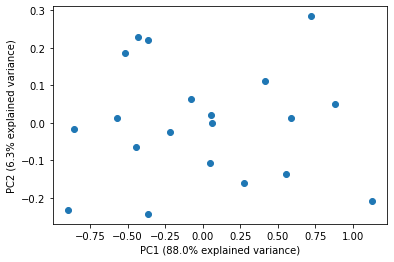

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
PCA(n_components=2)   # aim to select first two principal components
pca.fit(data)
pca_transf = pca.transform(data)

plt.scatter(pca_transf[:,0], pca_transf[:,1]) #, c = y)
plt.xlabel('PC1 ({}% explained variance)'.format(pca.explained_variance_ratio_[0].round(3)*100))
plt.ylabel('PC2 ({}% explained variance)'.format(pca.explained_variance_ratio_[1].round(3)*100))
plt.show()

For future reference or uses, this is a set of codes to plot the famous biplot.

Source : https://stackoverflow.com/questions/44105773/how-do-i-show-a-scatter-plot-in-python-after-doing-pca

What is this biplot telling us? Each feature variable that went into the PCA has an associated arrow. Arrows for each feature variable point in the direction of increasing values of that variable.

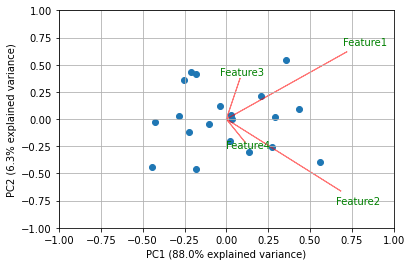

In [13]:
#Create the biplot function
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) #, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Feature"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC1 ({}% explained variance)'.format(pca.explained_variance_ratio_[0].round(3)*100))
plt.ylabel('PC2 ({}% explained variance)'.format(pca.explained_variance_ratio_[1].round(3)*100))
plt.grid()

#Call the function. Use only the 2 PCs.
biplot(pca_transf,np.transpose(pca.components_))
plt.show()

Source: https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html

If you look at the ‘Feature1’ arrow, it points towards high values of PC1 - so we know the hgher the value of PC1, the higher the Feature 1. If you look at the ‘Feature2’ arrow, it points towards high values of PC1 - so we know the hgher the value of PC1, the higher the Feature 2. Thus the directions of 'Feature1' and 'Feature2' points to same direction of PC1, reflecting with the positive values/loadings of $0.718$ and $0.682$.

Note that the directions of 'Feature1' and 'Feature2' points to opposite directions of PC2, reflecting with the values/loadings of $0.617$ and $-0.660$.

Note that the length of the arrow indicates the size of the loading to the feature and the sign indidcate the direction of the loading relation to the feature.

The arrows on the biplot are actually representative of the eigenvectors (loadings), so we could just as easily obtain this information from the matrix of the PCA Components to create a Pandas Data Frame as the following:

In [14]:
import pandas as pd
pca.components_.T
loadings = pd.DataFrame(pca.components_.T[:,0:2].round(3), columns=['PC1','PC2'],
                        index=['Feature 1','Feature 2', 'Feature 3', 'Feature 4'])
loadings

,PC1,PC2
Feature 1,0.718,0.617
Feature 2,0.682,-0.660
Feature 3,0.081,0.372
Feature 4,0.111,-0.211


***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.